In [1]:
!pip install xlrd


In [3]:
import pandas as pd

# Cargar el archivo XLS desde el almacenamiento de Colab
df = pd.read_excel('/content/Monterrey.xlsx')

# Visualizamos las primeras filas del dataframe
df.head()

,NUM\nBENEF,BENEFICIARIO,RFC,FAC,CONTRATO,CONCEPTO,TIPO,FDO,FECHA,IMPORTE
0,116136,"SERVICIOS GASOLINEROS DE MEXICO, S.A. DE C.V.",SGM950714DC2,500/2016-153001-4,NO APLICA,CUMPLIMIENTO A LA SENTENCIA DE JUICIO ORDINARI...,CH,1102629.0,2020-01-31,25870784.81
1,Total 116136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,25870784.81
2,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,100054946-158003-31,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000040.0,2020-01-31,3854000.00
3,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,100054945-158003-30,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000040.0,2020-01-31,9000000.00
4,Total 116684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,12854000.00


In [4]:
# Información básica del dataframe
df.info()

# Estadísticas descriptivas
df.describe()

# Mostrar los nombres de las columnas
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11584 entries, 0 to 11583
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NUM
BENEF     11584 non-null  object        
 1   BENEFICIARIO  9907 non-null   object        
 2   RFC           9907 non-null   object        
 3   FAC           9903 non-null   object        
 4   CONTRATO      9907 non-null   object        
 5   CONCEPTO      9907 non-null   object        
 6   TIPO          9907 non-null   object        
 7   FDO           9906 non-null   float64       
 8   FECHA         9078 non-null   datetime64[ns]
 9   IMPORTE       11584 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 905.1+ KB


Index(['NUM\nBENEF', 'BENEFICIARIO', 'RFC', 'FAC', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO', 'FECHA', 'IMPORTE'],
      dtype='object')

In [5]:
# Contar los valores faltantes por columna
df.isnull().sum()


,0
NUM\nBENEF,0
BENEFICIARIO,1677
RFC,1677
FAC,1681
CONTRATO,1677
CONCEPTO,1677
TIPO,1677
FDO,1678
FECHA,2506
IMPORTE,0


In [6]:
# Eliminar filas con valores faltantes
df_clean = df.dropna()


In [7]:
# Verificar si hay fechas inválidas (valores NaT o datos corruptos)
fechas_invalidas = df[pd.to_datetime(df['FECHA'], errors='coerce').isna()]

# Mostrar las filas con fechas inválidas
fechas_invalidas[['FECHA']]

,FECHA
1,NaT
4,NaT
6,NaT
9,NaT
11,NaT
...,...
11550,NaT
11553,NaT
11558,NaT
11564,NaT


In [8]:
# Eliminar filas donde FECHA es inválida
df = df[pd.to_datetime(df['FECHA'], errors='coerce').notna()]

In [9]:
# Verificar si hay fechas inválidas (valores NaT o datos corruptos)
fechas_invalidas = df[pd.to_datetime(df['FECHA'], errors='coerce').isna()]

# Mostrar las filas con fechas inválidas
fechas_invalidas[['FECHA']]

,FECHA


In [10]:
df['FECHA'] = pd.to_datetime(df['FECHA'])

In [11]:
df.to_excel('Monterrey1.xlsx', index=False)

In [12]:
import pandas as pd

# Cargar el archivo XLS desde el almacenamiento de Colab
df = pd.read_excel('/content/Monterrey1.xlsx')

# Visualizamos las primeras filas del dataframe
df.head()

,NUM\nBENEF,BENEFICIARIO,RFC,FAC,CONTRATO,CONCEPTO,TIPO,FDO,FECHA,IMPORTE
0,116136,"SERVICIOS GASOLINEROS DE MEXICO, S.A. DE C.V.",SGM950714DC2,500/2016-153001-4,NO APLICA,CUMPLIMIENTO A LA SENTENCIA DE JUICIO ORDINARI...,CH,1102629.0,2020-01-31,25870784.81
1,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,100054946-158003-31,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000040.0,2020-01-31,3854000.00
2,116684,"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",ISB840628IB2,100054945-158003-30,SSP-189-2017,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS T...,TR,604000040.0,2020-01-31,9000000.00
3,126020,INSTITUTO DE LA JUVENTUD REGIA,IJR070509Q24,A66-153001-3,NO APLICA,PRIMERA MINISTRACION DEL EJERCICIO 2020 CORRES...,TR,1016366.0,2020-01-30,959000.00
4,126224,"BANCO MULTIVA, SA. G.F.M.",BMI061005NY5,FS-1-2020-158004-3,NO APLICA,FONDO SAPS 1-2020,TR,1016353.0,2020-01-30,9364680.23


In [13]:
# Comprobar si todavía hay valores nulos en el DataFrame
df_clean.isnull().sum()


,0
NUM\nBENEF,0
BENEFICIARIO,0
RFC,0
FAC,0
CONTRATO,0
CONCEPTO,0
TIPO,0
FDO,0
FECHA,0
IMPORTE,0


In [15]:
# Verificar si hay fechas inválidas (valores NaT o datos corruptos)
fechas_invalidas = df[pd.to_datetime(df['FECHA'], errors='coerce').isna()]

# Mostrar las filas con fechas inválidas
fechas_invalidas[['FECHA']]

,FECHA


In [16]:
# Verificar los tipos de datos del DataFrame
df_clean.dtypes



,0
NUM\nBENEF,object
BENEFICIARIO,object
RFC,object
FAC,object
CONTRATO,object
CONCEPTO,object
TIPO,object
FDO,float64
FECHA,datetime64[ns]
IMPORTE,float64


In [17]:
# Información básica del dataframe
df.info()

# Estadísticas descriptivas
df.describe()

# Mostrar los nombres de las columnas
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9078 entries, 0 to 9077
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NUM
BENEF     9078 non-null   int64         
 1   BENEFICIARIO  9078 non-null   object        
 2   RFC           9078 non-null   object        
 3   FAC           9074 non-null   object        
 4   CONTRATO      9078 non-null   object        
 5   CONCEPTO      9078 non-null   object        
 6   TIPO          9078 non-null   object        
 7   FDO           9077 non-null   float64       
 8   FECHA         9078 non-null   datetime64[ns]
 9   IMPORTE       9078 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 709.3+ KB


Index(['NUM\nBENEF', 'BENEFICIARIO', 'RFC', 'FAC', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO', 'FECHA', 'IMPORTE'],
      dtype='object')

In [18]:
# Información básica del dataset (columnas, tipos de datos y valores no nulos)
df.info()

# Primeras filas para tener una vista previa del dataset
df.head()

# Estadísticas descriptivas de las columnas numéricas
df.describe()

# Verificar los valores faltantes por columna
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9078 entries, 0 to 9077
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NUM
BENEF     9078 non-null   int64         
 1   BENEFICIARIO  9078 non-null   object        
 2   RFC           9078 non-null   object        
 3   FAC           9074 non-null   object        
 4   CONTRATO      9078 non-null   object        
 5   CONCEPTO      9078 non-null   object        
 6   TIPO          9078 non-null   object        
 7   FDO           9077 non-null   float64       
 8   FECHA         9078 non-null   datetime64[ns]
 9   IMPORTE       9078 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 709.3+ KB


,0
NUM\nBENEF,0
BENEFICIARIO,0
RFC,0
FAC,4
CONTRATO,0
CONCEPTO,0
TIPO,0
FDO,1
FECHA,0
IMPORTE,0


In [19]:
# Conteo de ocurrencias en la columna BENEFICIARIO
df['BENEFICIARIO'].value_counts()


,count
BENEFICIARIO,
S.I.M.E.P.R.O.D.E.,557
"INTERASFALTOS, S.A. DE C.V.",399
"CAR ONE MONTERREY, S.A. DE C.V.",276
GARCIA ZAVALA EDGAR ALEJANDRO JOBERAGAN,267
"CAR ONE AMERICANA,S.A.DE C.V.",231
...,...
OCAÑAS MENDEZ EVARISTO,1
BERSOZA GARCIA SINTHIA MALLELY,1
QUIÑONEZ RAMOS VERONICA,1


In [20]:
# Número de valores únicos en la columna RFC
df['RFC'].nunique()


645

In [21]:
# Número de pagos por proveedor (BENEFICIARIO)
pagos_por_proveedor = df.groupby('BENEFICIARIO')['IMPORTE'].count()
pagos_por_proveedor


,IMPORTE
BENEFICIARIO,
"235 PROYECTOS, S.A. DE C.V.",4
"3G CONSULTING Y ASESORIA, S.A. DE C.V.",1
"7-ELEVEN MEXICO, SA. DE CV.",1
ABUNDIS RANGEL BRENDA IDALIA,1
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",1
...,...
"YOR TE, S.A. DE C.V.",2
ZAMARRIPA ESQUIVEL DORINA ALEJANDRA,1
ZAPATA VALDEZ DIEGO DE JESUS,1


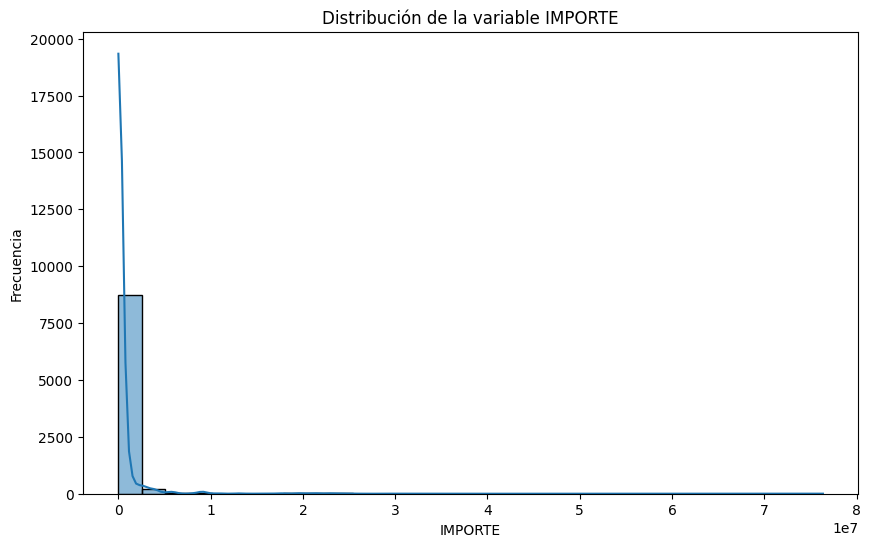

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la variable IMPORTE
plt.figure(figsize=(10,6))
sns.histplot(df['IMPORTE'], bins=30, kde=True)
plt.title('Distribución de la variable IMPORTE')
plt.xlabel('IMPORTE')
plt.ylabel('Frecuencia')
plt.show()


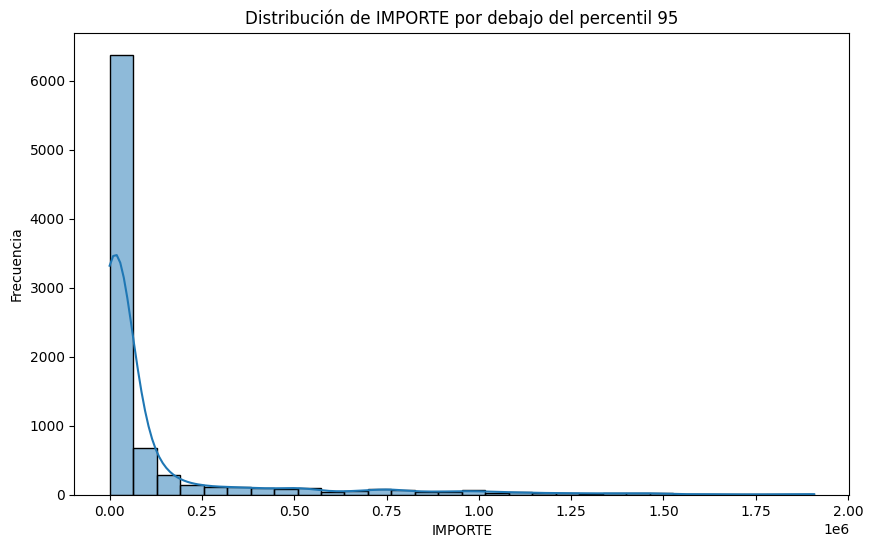

In [23]:
# Calcular el percentil 95
percentil_95 = df['IMPORTE'].quantile(0.95)

# Filtrar los importes por debajo del percentil 95
df_filtrado = df[df['IMPORTE'] <= percentil_95]

# Histograma de los importes filtrados
plt.figure(figsize=(10,6))
sns.histplot(df_filtrado['IMPORTE'], bins=30, kde=True)
plt.title('Distribución de IMPORTE por debajo del percentil 95')
plt.xlabel('IMPORTE')
plt.ylabel('Frecuencia')
plt.show()


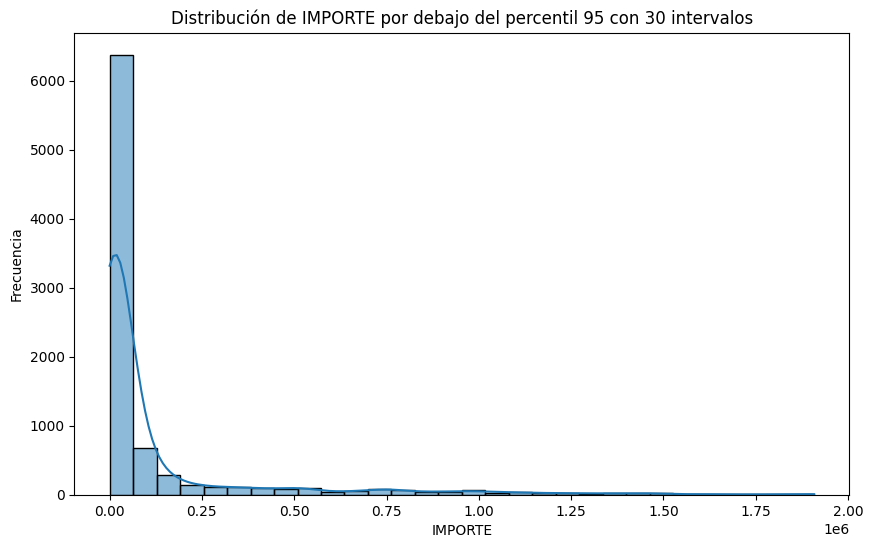

In [24]:
# Histograma con 30 intervalos
plt.figure(figsize=(10,6))
sns.histplot(df_filtrado['IMPORTE'], bins=30, kde=True)
plt.title('Distribución de IMPORTE por debajo del percentil 95 con 30 intervalos')
plt.xlabel('IMPORTE')
plt.ylabel('Frecuencia')
plt.show()


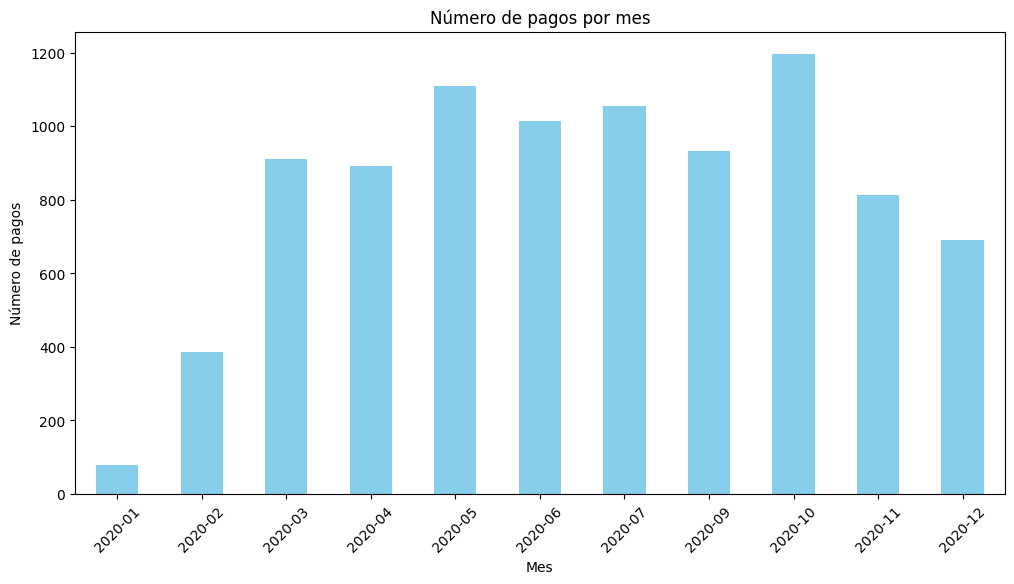

In [25]:
# Conteo de pagos por mes
df['FECHA'] = pd.to_datetime(df['FECHA'])
pagos_por_mes = df['FECHA'].dt.to_period('M').value_counts().sort_index()

# Graficar el número de pagos por mes
plt.figure(figsize=(12,6))
pagos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Número de pagos por mes')
plt.xlabel('Mes')
plt.ylabel('Número de pagos')
plt.xticks(rotation=45)
plt.show()


<ipython-input-26-bb9cb71b6838>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipo_pagos.index, y=tipo_pagos.values, palette='viridis')


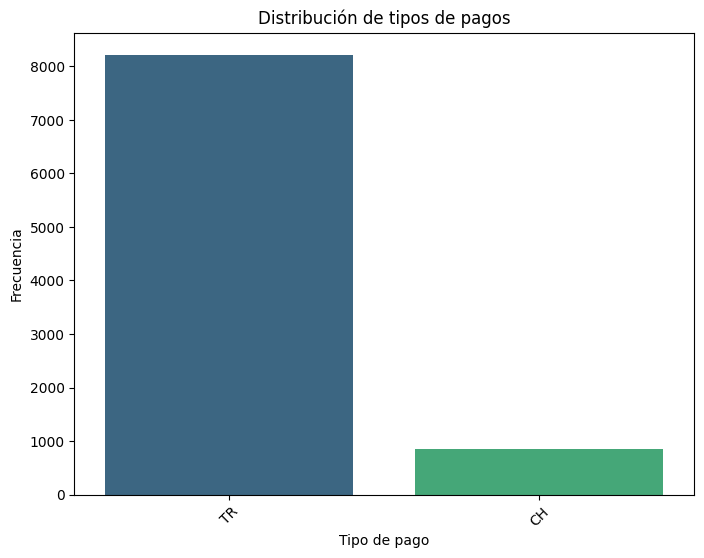

In [26]:
# Conteo de ocurrencias en la columna TIPO
tipo_pagos = df['TIPO'].value_counts()

# Graficar la distribución de tipos de pagos
plt.figure(figsize=(8,6))
sns.barplot(x=tipo_pagos.index, y=tipo_pagos.values, palette='viridis')
plt.title('Distribución de tipos de pagos')
plt.xlabel('Tipo de pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Identificar los beneficiarios con mayor carga económica
mayor_carga_economica = df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False)

# Mostrar los 10 principales beneficiarios con mayor carga económica
mayor_carga_economica.head(10)


,IMPORTE
BENEFICIARIO,
MUNICIPIO DE LA CIUDAD DE MONTERREY,1.447137e+09
"BANCO MULTIVA, SA. G.F.M.",2.066314e+08
"RED RECOLECTOR, S.A. DE C.V.",1.834956e+08
"SI VALE MEXICO, S.A. DE C.V.",1.493217e+08
"SERVICIOS BROXEL, S.A.P.I. DE C.V.",1.483020e+08
"INDUSTRIAS SOLA BASIC, S.A. DE C.V.",1.413940e+08
"HISA FARMACEUTICA, S.A. DE C.V.",1.371292e+08
"INTERASFALTOS, S.A. DE C.V.",1.296880e+08
CFE SUMINISTRADOR DE SERVICIOS BASICOS,1.082748e+08


In [29]:
# Calcular el gasto promedio por cada categoría (TIPO)
gasto_promedio_tipo = df.groupby('TIPO')['IMPORTE'].mean().sort_values(ascending=False)

# Mostrar los resultados
gasto_promedio_tipo


,IMPORTE
TIPO,
TR,527056.29363
CH,54696.55757


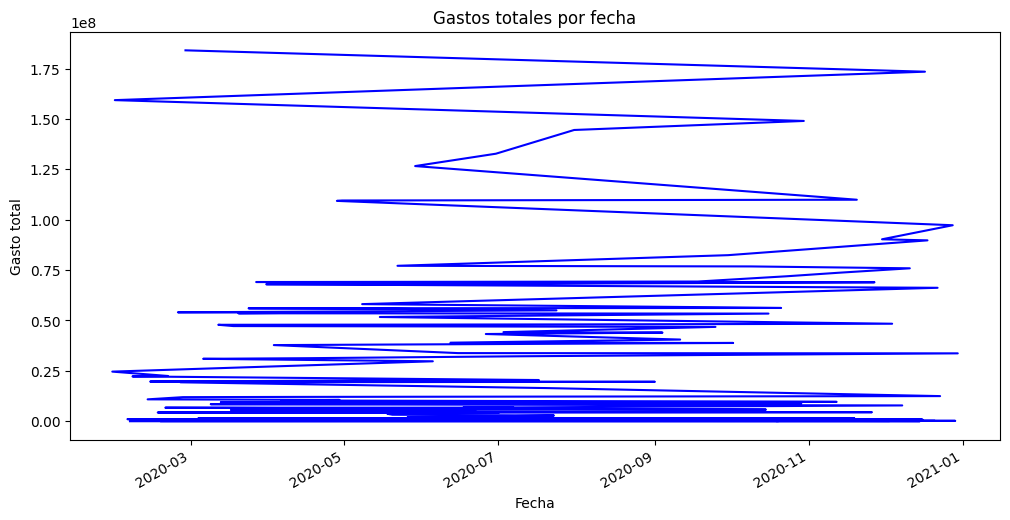

In [30]:
# Determinar el gasto total por fecha
gastos_por_fecha = df.groupby('FECHA')['IMPORTE'].sum().sort_values(ascending=True)

# Mostrar los primeros resultados
gastos_por_fecha.head()

# Graficar los gastos por fecha
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
gastos_por_fecha.plot(kind='line', color='blue')
plt.title('Gastos totales por fecha')
plt.xlabel('Fecha')
plt.ylabel('Gasto total')
plt.show()


In [31]:
# Contar cuántos tipos de pago recibe cada beneficiario
tipos_por_beneficiario = df.groupby(['BENEFICIARIO', 'TIPO']).size().unstack(fill_value=0)

# Mostrar los primeros resultados
tipos_por_beneficiario.head()


TIPO,CH,TR
BENEFICIARIO,,
"235 PROYECTOS, S.A. DE C.V.",0,4
"3G CONSULTING Y ASESORIA, S.A. DE C.V.",0,1
"7-ELEVEN MEXICO, SA. DE CV.",1,0
ABUNDIS RANGEL BRENDA IDALIA,1,0
"ACEROS Y OVEROLLINGS DE MEXICO, SA. DE CV.",1,0


In [32]:
# Calcular el gasto total por contrato
gastos_por_contrato = df.groupby('CONTRATO')['IMPORTE'].sum().sort_values(ascending=False)

# Mostrar los principales contratos con mayor gasto
gastos_por_contrato.head()


,IMPORTE
CONTRATO,
NO APLICA,2.182595e+09
SSP-157-13,1.834956e+08
SAD-567-2019,1.491351e+08
SSP-189-2017,1.413940e+08
SAD-538-2019,1.371292e+08


In [34]:
# Lista personalizada de palabras de parada en español
stop_words_spanish = [
    'de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las',
    'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'es', 'lo', 'como',
    'más', 'pero', 'sus', 'le', 'ya', 'o', 'fue', 'este', 'ha', 'sí',
    'porque', 'esta', 'son', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también',
    'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante',
    'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante',
    'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro',
    'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada',
    'muchos', 'cual', 'poco', 'ella', 'estar', 'estas'
]

# Crear un vectorizador con las palabras de parada en español
vectorizer = CountVectorizer(stop_words=stop_words_spanish)

# Transformar los conceptos a una matriz de términos-frecuencia
conceptos_matrix = vectorizer.fit_transform(df['CONCEPTO'].dropna())

# Contar las palabras más frecuentes
frecuencia_palabras = dict(zip(vectorizer.get_feature_names_out(), conceptos_matrix.sum(axis=0).A1))

# Convertir a un DataFrame para ordenarlas
import pandas as pd
frecuencia_palabras_df = pd.DataFrame(frecuencia_palabras.items(), columns=['Palabra', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Mostrar las palabras más frecuentes
frecuencia_palabras_df.head(10)


,Palabra,Frecuencia
298,2020,4363
4027,mantenimiento,3034
4375,pat,2431
4143,mod,2170
5189,vehiculo,2091
4287,oficial,2027
295,2017,1622
362,28,1225
4401,periodo,1168
4615,ramo,1152


In [35]:
# Crear un vectorizador sin palabras de parada
vectorizer = CountVectorizer()

# Transformar los conceptos a una matriz de términos-frecuencia
conceptos_matrix = vectorizer.fit_transform(df['CONCEPTO'].dropna())

# Contar las palabras más frecuentes
frecuencia_palabras = dict(zip(vectorizer.get_feature_names_out(), conceptos_matrix.sum(axis=0).A1))

# Convertir a un DataFrame para ordenarlas
import pandas as pd
frecuencia_palabras_df = pd.DataFrame(frecuencia_palabras.items(), columns=['Palabra', 'Frecuencia']).sort_values(by='Frecuencia', ascending=False)

# Mostrar las palabras más frecuentes
frecuencia_palabras_df.head(10)


,Palabra,Frecuencia
3117,de,18217
3133,del,4549
298,2020,4363
4045,mantenimiento,3034
3908,la,2641
4395,pat,2431
2360,al,2277
4161,mod,2170
5220,vehiculo,2091
4306,oficial,2027


In [36]:
# Crear nuevas columnas para el año, mes y día
df['Año'] = df['FECHA'].dt.year
df['Mes'] = df['FECHA'].dt.month
df['Día'] = df['FECHA'].dt.day

# Verificar la expansión
df[['FECHA', 'Año', 'Mes', 'Día']].head()


,FECHA,Año,Mes,Día
0,2020-01-31,2020,1,31
1,2020-01-31,2020,1,31
2,2020-01-31,2020,1,31
3,2020-01-30,2020,1,30
4,2020-01-30,2020,1,30


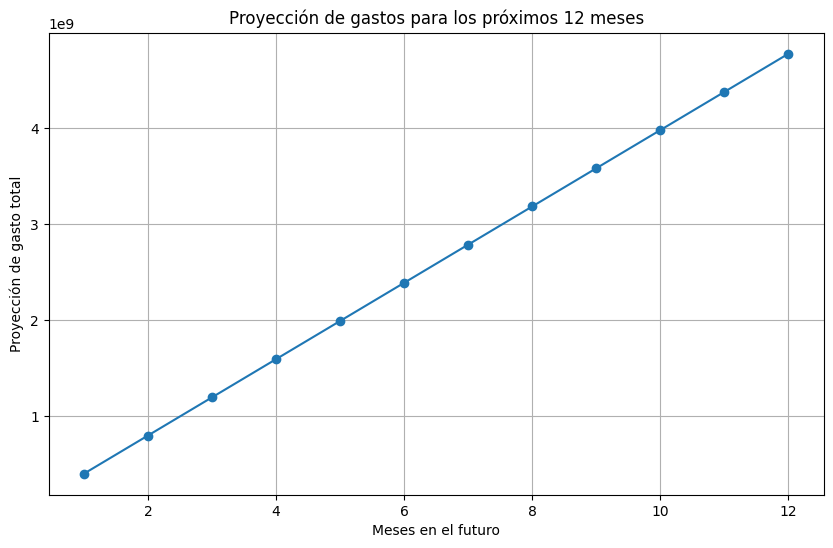

In [37]:
# Calcular el gasto promedio por mes
gasto_mensual_promedio = df.groupby(['Año', 'Mes'])['IMPORTE'].sum().mean()

# Proyectar el gasto para los próximos 12 meses
import numpy as np
meses_futuros = np.arange(1, 13)
proyeccion_gastos_futuros = gasto_mensual_promedio * meses_futuros

# Graficar la proyección
plt.figure(figsize=(10,6))
plt.plot(meses_futuros, proyeccion_gastos_futuros, marker='o')
plt.title('Proyección de gastos para los próximos 12 meses')
plt.xlabel('Meses en el futuro')
plt.ylabel('Proyección de gasto total')
plt.grid(True)
plt.show()


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Para este ejemplo, creamos una variable binaria de alto/bajo importe
df['IMPORTE_ALTO'] = df['IMPORTE'] > df['IMPORTE'].median()

# Seleccionamos variables relevantes para el modelo
X = df[['FDO', 'CONTRATO', 'TIPO']]  # Puedes agregar más columnas si es necesario
y = df['IMPORTE_ALTO']

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:
# Realizar One-Hot Encoding en las variables categóricas
X = pd.get_dummies(df[['FDO', 'CONTRATO', 'TIPO']])

# Dividir los datos nuevamente
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo Random Forest con las variables codificadas
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7353157121879589
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.68      0.88      0.77      1344
        True       0.83      0.60      0.70      1380

    accuracy                           0.74      2724
   macro avg       0.76      0.74      0.73      2724
weighted avg       0.76      0.74      0.73      2724



In [41]:
# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = rf_model.predict(X_test)


In [42]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7353157121879589
Reporte de clasificación:
              precision    recall  f1-score   support

       False       0.68      0.88      0.77      1344
        True       0.83      0.60      0.70      1380

    accuracy                           0.74      2724
   macro avg       0.76      0.74      0.73      2724
weighted avg       0.76      0.74      0.73      2724



In [43]:
from sklearn.preprocessing import StandardScaler

# Agrupar por el número de contratos, suma del importe y número de facturas, y otra variable 'TIPO'
df_kmeans = df.groupby('CONTRATO').agg({
    'IMPORTE': 'sum',
    'FAC': 'count',
    'TIPO': 'nunique'  # Número de tipos únicos por contrato
}).reset_index()

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans[['IMPORTE', 'FAC', 'TIPO']])


In [44]:
from sklearn.cluster import KMeans

# Crear e implementar K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Puedes cambiar el número de clusters
kmeans.fit(X_scaled)

# Añadir los clusters al dataset
df_kmeans['Cluster'] = kmeans.labels_


In [45]:
print(df_kmeans)

             CONTRATO     IMPORTE  FAC  TIPO  Cluster
0        APS931217911  1076465.75    2     1        0
1        BAW980401AT4   456168.32    2     1        0
2        BBA830831LI2  1859589.69    1     1        0
3       CAGG6306021I8     1937.00    1     1        0
4        CIM610120IP5   597397.64    2     1        0
...               ...         ...  ...   ...      ...
4599     TES-225-2020  1048949.36    8     1        0
4600     TES-229-2020   163105.47    9     1        0
4601    XAXX010101000  4202451.86    1     1        0
4602  o.t. 2020020086     5104.00    1     1        0
4603     tes-075-2014  1919840.39    1     1        0

[4604 rows x 5 columns]


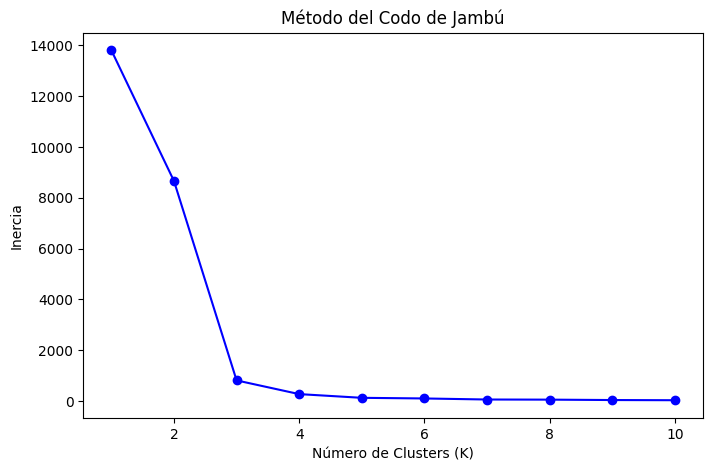

In [46]:
import matplotlib.pyplot as plt

# Calcular la inercia para diferentes valores de K
inercia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Graficar el "Codo de Jambú"
plt.figure(figsize=(8,5))
plt.plot(K_range, inercia, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo de Jambú')
plt.show()


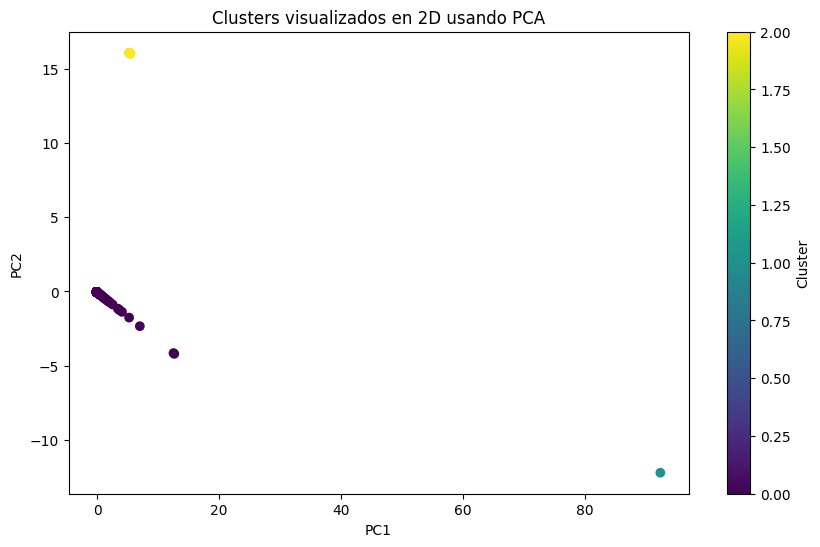

In [47]:
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los datos reducidos y los clusters
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_kmeans['Cluster']

# Graficar los clusters
plt.figure(figsize=(10,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('Clusters visualizados en 2D usando PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()
